In [1]:
import cryoenv.cryosig as cs
import numpy as np
import matplotlib.pyplot as plt
import pickle

%config InlineBackend.figure_formats = ['svg']

In [2]:
names = ['li1p', 'li1l', 'li2p']

pars = {}

name = names[2]

In [3]:
with open("saved_pars/{}_pars.pkl".format(name),"rb") as fh:
    pars[name] = pickle.load(fh)

In [4]:
pars['li2p']

{'C': array([0.00249282, 0.09697355]),
 'Gb': array([0.37109128, 1.22344427]),
 'G': array([[0.        , 0.20393504],
        [0.20393504, 0.        ]]),
 'lamb': array([0.00039667, 0.00039667]),
 'lamb_tp': array([0.00497]),
 'eps': array([[0.03516907, 0.96483093],
        [0.03516907, 0.96483093]]),
 'Rs': array([0.04]),
 'Rh': array([1.047313]),
 'L': array([3.5e-07]),
 'Rt0': array([0.1]),
 'k': array([5.52147239]),
 'Tc': array([29.185]),
 'Ib': array([6.00096]),
 'dac': array([1.52]),
 'pulser_scale': array([0.08]),
 'heater_current': array([8.273832]),
 'eta': array([5.76666667]),
 'tes_flag': array([ True, False]),
 'heater_flag': array([False,  True]),
 'i_sq': array([1.2]),
 'tes_fluct': array([0.0001]),
 'flicker_slope': array([2.]),
 'emi': array([[1.5e-05, 1.5e-05, 1.5e-05]]),
 'tau_cap': array([1]),
 'Ib_range': (0.0, 17.86),
 'excess_johnson': array([1]),
 'R_op_target': 0.03221787778516074,
 'tau_eff': 0.01205657907,
 'tau_t': 0.07926274212000001,
 'nps': array([[0.0000

In [5]:
pars['li2p']['Tc'][0] = 29.4

In [6]:
# standard scenario
det = cs.DetectorModel(**pars[name])

In [7]:
det.kwargs['R_op_target'] = 0.05

In [8]:
# det.Gb = np.array([0.15, 1.5])

In [9]:
det.delta_h = np.array([[0.8, 0.2]])

In [10]:
det.wait(5)

set correct DAC

In [11]:
det.T

array([[32.07947249, 18.96715573],
       [32.07947249, 18.96715573],
       [32.07947249, 18.96715573],
       ...,
       [32.07947249, 18.96715573],
       [32.07947249, 18.96715573],
       [32.07947249, 18.96715573]])

In [12]:
det.dac

array([1.52])

In [13]:
bnds = {'li2p': (0.,2.), }

res = det.solve_dac(det.kwargs['R_op_target'], bnds[name])

/Users/felix/.pyenv/versions/3.10.10/lib/python3.10/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [14]:
res

# li1p: 1.5442608973567993

1.2634496158732513

In [15]:
det.set_control(dac=np.array([res]), Ib=det.Ib)

In [16]:
det.wait(5)

In [17]:
det.T[-1]

array([29.40065538, 18.32669966])

finetune pulse shape parameters

In [18]:
# rranges = (slice(0.05, .15, 2e-3),
#            slice(1.1, 1.3, 2e-3),
#            slice(0., 0.3, 2e-3),
#            )

# resbrute = det.solve_time_constants([det.kwargs['tau_eff'], det.kwargs['tau_t']], rranges, print_iv=10000)

det.G[0,1] = 0.1
det.G[1,0] = 0.1
det.Gb[0] = 0.138 # 11469603
det.Gb[1] = 1.16  # 15220635


In [19]:
# resbrute[0]

# # before: 'Gb': array([0.37109128, 1.22344427]), 'G' 0.2

# # li2p: array([0.11469603, 1.15220635, 0.11738399])

find effective heater resistance

In [20]:
pars[name]['dac']

array([1.52])

In [21]:
det.set_control(dac=pars[name]['dac']/3, Ib=det.Ib)

In [22]:
bnds = {'li2p': (.1,2.), }

res = det.solve_Rh(det.kwargs['R_op_target'], bnds[name])
# det.Rh[0] = 1.0663622955026177

In [23]:
res

# li2p: 1.0663622955026177

1.05

find suitable epsilon

In [24]:
#det.set_control(dac=np.array([.2]), Ib=det.Ib)
det.wait(5)

In [25]:
pars[name]['dac']

array([1.52])

In [26]:
bnds = {'li2p': (0.2,.6), }

res = det.solve_dac(det.kwargs['R_op_target'], bnds[name])

In [27]:
res

0.504323207028774

In [181]:
# det.set_control(dac=np.array([.4885]), Ib=det.Ib)  # play per hand!
# det.wait(5)

In [182]:
# det.Rt[0](det.T[-1,0])  # target temp: 29.47

In [29]:
det.T

array([[29.40029176, 16.71822441],
       [29.40029176, 16.71822441],
       [29.40029176, 16.71822441],
       ...,
       [29.40029176, 16.71822441],
       [29.40029176, 16.71822441],
       [29.40029176, 16.71822441]])

In [30]:
# det.set_control(dac=pars[name]['dac'], Ib=det.Ib)
# det.wait(5)

In [31]:
det.eps

array([[0.03516907, 0.96483093],
       [0.03516907, 0.96483093]])

In [32]:
res = det.solve_collection_efficiency(5.9 * 8/9 + 1/9 * 6.4, 0.523, (0.01, 0.2))

In [33]:
res

# li1p: 0.10377790654938981

0.10388716078741164

In [109]:
# det.eps

In [110]:
# det.eps[1,0] = 0.115
# det.eps[1,1] = 1 - 0.115

find suitable pulser scaler

In [111]:
# res = det.solve_pulser_scale(1., 0.2, (0.0, 0.1))

In [112]:
# res

# li1p: 

In [113]:
# det.pulser_scale = np.array([0.08/4])

find suitable delta

In [34]:
res = det.solve_delta(1., 0.31, (0.0, 0.9))

In [35]:
res

0.027846898541878693

T0 is [29.40029176 16.71822441] mK.
Calculated in 0.6581461429595947 s.
Generated noise in 0.006329059600830078 s.


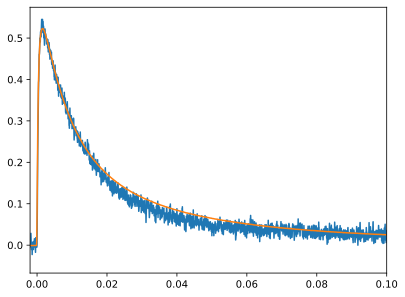

T0 is [29.40029176 16.71822441] mK.
Calculated in 0.6398270130157471 s.
Generated noise in 0.00661015510559082 s.


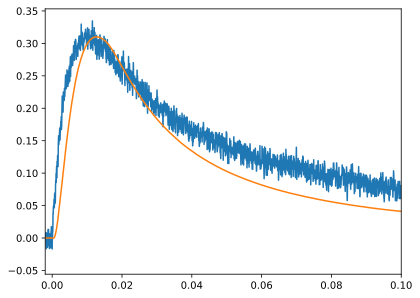

29.400311868871228 0.04994810562154557


In [36]:
det.wait(5)

det.trigger(er=np.array([0., (5.9 * 8/9 + 1/9 * 6.4)]), tpa=np.array([0.0]))

evsim = det.get_record()

plt.plot(det.kwargs['sev'][:,0], evsim)
plt.plot(det.kwargs['sev'][:,0] + 0.002, det.kwargs['sev'][:,1]*0.523)
plt.xlim(-0.002,0.1)
plt.show()

det.wait(5)

det.trigger(er=np.array([0., 0.]), tpa=np.array([1.]))

evsim = det.get_record()

plt.plot(det.kwargs['sev_tp'][:,0], evsim)
plt.plot(det.kwargs['sev_tp'][:,0], det.kwargs['sev_tp'][:,1]*0.31)
plt.xlim(-0.002,0.1)
plt.show()

print(det.T[-1,0], det.Rt[0](det.T[-1,0]))

T0 is [29.40029176 16.71822441] mK.
Calculated in 0.7003898620605469 s.
Generated noise in 0.006498098373413086 s.


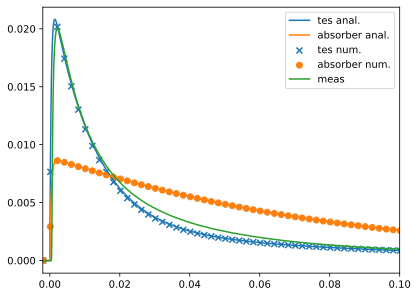

In [37]:
# det.set_control(dac=[1.662], Ib=[5], norm=False)

det.wait(5)

tp = False

if not tp:
    det.trigger(er=np.array([0., (5.9 * 8/9 + 1/9 * 6.4)]), tpa=np.array([0.0]))
else:
    det.trigger(er=np.array([0., 0.]), tpa=np.array([1.0]))

evsim = det.get_record()

temps = det.get_temperatures()
thermal_ps = det.get_thermal_pulseshape(5.9 * 8/9 + 1/9 * 6.4)

if not tp:
    plt.plot(det.t - det.t0, thermal_ps[0], label='tes anal.')
    plt.plot(det.t - det.t0, thermal_ps[1], label='absorber anal.')
plt.scatter(det.t[::50] - det.t0, temps[::50,0] - np.mean(temps[:2000,0]), label='tes num.', marker='x')
plt.scatter(det.t[::50] - det.t0, temps[::50,1] - np.mean(temps[:2000,1]), label='absorber num.', marker='o')
if not tp:
    plt.plot(det.kwargs['sev'][:,0] + 0.0026, det.kwargs['sev'][:,1]*0.02, label='meas')
else:
    plt.plot(det.kwargs['sev_tp'][:,0], det.kwargs['sev_tp'][:,1]*0.012, label='meas')
plt.legend()
plt.xlim(-0.002,0.1)
plt.show()

fit noise parameters

In [38]:
det.flicker_slope = np.array([2.])

In [39]:
det.tes_fluct = np.array([8e-5])
# det.solve_tes_fluctuations(nps=det.kwargs['nps'][:,1])
# hm does not work very well automatically

In [40]:
# det.solve_johnson_excess(det.kwargs['nps'][:,1])  # hmm i think we are comparing differnt units
det.excess_johnson = np.array([1])

In [41]:
# det.solve_emi(det.kwargs['nps'][:,1])
det.emi = np.array([[3e-5, 2e-5, 2e-5]])

sets see all together in action

In [42]:
# det.Rh[0] = 3.49

det.wait(5)

det.trigger(er=np.array([0., 5.95]), tpa=np.array([0.0])) 

det.ph

T0 is [29.40029176 16.71822441] mK.
Calculated in 0.687999963760376 s.
Generated noise in 0.010639190673828125 s.


array([0.53388249])

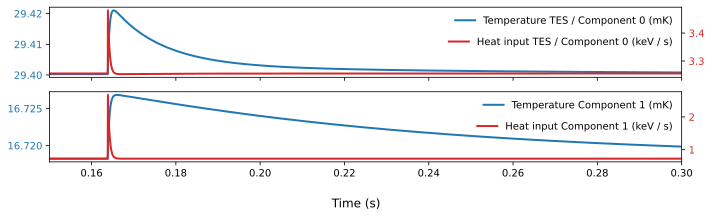

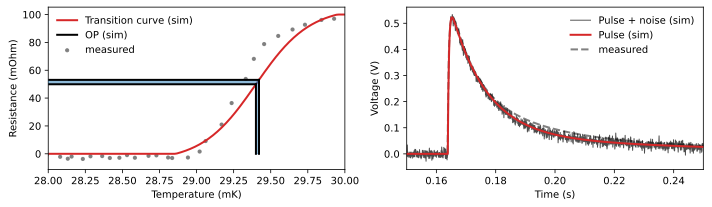

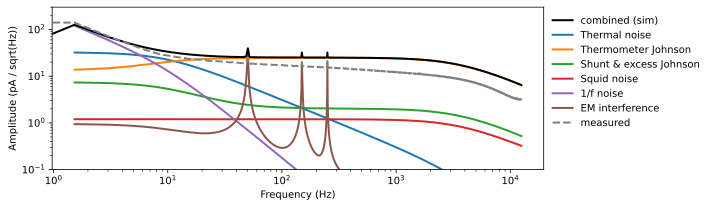

In [43]:
det.plot_temperatures(save_path=None, xlim=(0.15, 0.3), dpi=300)  # 'plots_paper/temperatures.png'

fig, axes = det.plot_tes(xlim_temp=(28., 30.), xlim_time=(0.15, 0.25), save_path=None, show=False, dpi=300)  # 'plots_paper/tes.png'
axes[0].scatter(pars[name]['transition_curve'][:,0], 1e3*(pars[name]['transition_curve'][:,1] - 0.012)*100/(100-12), 
                rasterized=True, color='grey', s=10, label='measured')
axes[1].plot(det.kwargs['sev'][:,0] + 0.002 + 0.16384, det.kwargs['sev'][:,1]*0.523, linestyle='dashed', color='grey', linewidth=2, label='measured')
axes[0].set_title('')
axes[1].set_title('')
axes[0].legend(frameon=False)
axes[1].legend(frameon=False)
plt.tight_layout()
plt.show()

for i in range(det.nmbr_tes):
    det.plot_nps(tes_channel=i, only_sum=False, save_path=None, show=False, dpi=300)  # 'plots_paper/nps_tes_{}.png'.format(i)
    plt.loglog(det.kwargs['nps'][:,0], np.sqrt(det.kwargs['nps'][:,1])*1e6, color='grey', linestyle='dashed', linewidth=2, label='measured', zorder=100)
    plt.legend(frameon=False, bbox_to_anchor=(1., 1.))
    plt.ylim(1e-1, 3e2)
    plt.title('')
    plt.tight_layout()
    plt.show()

In [44]:
det.print_noise_parameters()

Resistance TES / Resistance normal conducting: 0.4994504096227012
Temperature mixing chamber: 15.0 mK
Temperature TES: 29.40029176065503 mK
Resistance TES: 49.94504096227012 mOhm
Tau eff: 16.576939731053884 ms
TES Slope: 152.40831137319628 mOhm/mK
C: 4277.142500032959 fJ / K 
Geff: 258.01761781280476 pW / K
Tau in: 30.993786232122893 ms
Geb: 138.0 pW / K 
G ETF: 120.01761781280474 pW / K 
R shunt: 40.0 mOhm
Temperature shunt: 15.0 mK
i sq: 1.2 pA/sqrt(Hz)
1 / f amplitude (pW): 8e-05 
1 / f power (flicker slope): 2.0 
Tau el (s): 3.891265113179691e-06 
Tau I (s): -0.004514303398060698 
L_I (): 7.86568524513384 


In [45]:
import copy

pars_cryoenv = copy.deepcopy(pars)

pars_cryoenv[name]['Gb'] = det.Gb
pars_cryoenv[name]['G'] = det.G 
pars_cryoenv[name]['Rh'] = det.Rh
pars_cryoenv[name]['eps'] = det.eps
pars_cryoenv[name]['pulser_scale'] = det.pulser_scale
pars_cryoenv[name]['delta'] = det.delta
pars_cryoenv[name]['delta_h'] = det.delta_h
pars_cryoenv[name]['flicker_slope'] = det.flicker_slope
pars_cryoenv[name]['tes_fluct'] = det.tes_fluct
pars_cryoenv[name]['excess_johnson'] = det.excess_johnson
pars_cryoenv[name]['emi'] = det.emi
pars_cryoenv[name]['R_op_target'] = det.Rt[0](29.43198631)


In [46]:
fname = 'saved_pars/{}_pars_cryoenv.pkl'.format(name)

with open(fname, 'wb') as fh:
    pickle.dump(pars_cryoenv[name], fh)
    print('dictionary saved successfully to file {}'.format(fname))
    

dictionary saved successfully to file saved_pars/li2p_pars_cryoenv.pkl


In [47]:
name_load = 'li2p'

with open("saved_pars/{}_pars_cryoenv.pkl".format(name_load),"rb") as fh:
    pars_load = pickle.load(fh)

In [48]:
pars_load

{'C': array([0.00249282, 0.09697355]),
 'Gb': array([0.138, 1.16 ]),
 'G': array([[0. , 0.1],
        [0.1, 0. ]]),
 'lamb': array([0.00039667, 0.00039667]),
 'lamb_tp': array([0.00497]),
 'eps': array([[0.99      , 0.01      ],
        [0.10388716, 0.89611284]]),
 'Rs': array([0.04]),
 'Rh': array([1.0499475]),
 'L': array([3.5e-07]),
 'Rt0': array([0.1]),
 'k': array([5.52147239]),
 'Tc': array([29.4]),
 'Ib': array([6.00096]),
 'dac': array([1.52]),
 'pulser_scale': array([0.08]),
 'heater_current': array([8.273832]),
 'eta': array([5.76666667]),
 'tes_flag': array([ True, False]),
 'heater_flag': array([False,  True]),
 'i_sq': array([1.2]),
 'tes_fluct': array([8.e-05]),
 'flicker_slope': array([2.]),
 'emi': array([[3.e-05, 2.e-05, 2.e-05]]),
 'tau_cap': array([1]),
 'Ib_range': (0.0, 17.86),
 'excess_johnson': array([1]),
 'R_op_target': 0.054762929914988656,
 'tau_eff': 0.01205657907,
 'tau_t': 0.07926274212000001,
 'nps': array([[0.00000000e+00, 1.12118297e-07],
        [1.525